In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

## 1D Random Walks

In [6]:
def walk1D(steps):
    all_steps = np.random.choice([-1,1],steps)
    final_step = np.sum(all_steps)
    return all_steps, final_step

Mean: 0.382226
Sd: 316.0804617107564
Sqrt(n): 316.22776601683796


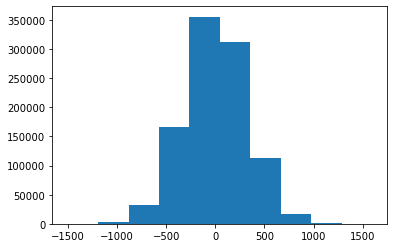

In [48]:
n_sims = 1000000
n_steps = 100000
final_steps = []
for i in range(n_sims):
    final_steps.append(walk1D(n_steps)[1])

plt.pyplot.hist(final_steps)

print(f"Mean: {np.mean(final_steps)}")
print(f"Sd: {np.std(final_steps)}")
print(f"Sqrt(n): {np.sqrt(n_steps)}")


Let $R_i$ represent each step. $R_i$ is an RV modelled by a Bernoulli trial that can take values 1 and -1 with probability 0.5 each:
$$ p(R_i = 1) = 0.5 \\ p(R_i = -1) = 0.5 $$
each $R_i$ has following properties:
$$\mathbb{E}(R_i) = 0 \\ Var(R_i) = 1$$

Our final state after n steps is represented by $S_n = R_1 + R_2 + ... + R_n$
$\newline$
Using linearity of expectation:
$$\mathbb{E}(S_n) = \mathbb{E}(\sum_{i=0}^{n}R_i) = \sum_{i=0}^{n}\mathbb{E}(R_i) = 0 $$
Additionally we use the fact that each step is independent so the Variance is linear
$$Var(S_n) = Var(\sum_{i=0}^{n}R_i) = \sum_{i=0}^{n}Var(R_i) = n $$
giving us $sd(S_n) = \sqrt n$
Whcich is consistend with our code.




## 2D Random Walks

In [12]:
def walk2D(steps):
    all_x_steps = np.random.choice([-1,1], steps)
    all_y_steps = np.random.choice([-1,1], steps)
    x_positions = np.cumsum(all_x_steps)
    y_positions = np.cumsum(all_y_steps)
    return np.array([x_positions, y_positions]), np.array([x_positions[-1], y_positions[-1]])



In [13]:
def walk2D(steps):
    all_x_steps = np.random.choice([-1,1], steps)
    all_y_steps = np.random.choice([-1,1], steps)
    x_positions =np.cumsum(all_x_steps)
    y_positions =np.cumsum(all_y_steps)
    return np.array([x_positions, y_positions]), np.array([x_positions[-1], y_positions[-1]])


KeyboardInterrupt: 

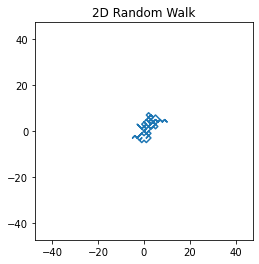

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


steps = 1000
sqst = np.sqrt(steps) *1.5
all_steps, final_step = walk2D(steps)


# Setup the figure
fig, ax = plt.subplots()
ax.set_xlim(-sqst, sqst)
ax.set_ylim(-sqst, sqst)
ax.set_aspect('equal')
ax.set_title('2D Random Walk')

line, = ax.plot([], [])

def update(frame):
    x = all_steps[0, :frame]
    y = all_steps[1, :frame]
    line.set_data(x, y)
    return line,

# Create animation
ani = FuncAnimation(fig, update, frames =steps, interval =5, blit =True)
# Display animation in Jupyter
HTML(ani.to_jshtml())



Now we will have a look at mean squared distance: 
We let $Y_1, Y_2, ... Y_n $ be RV denoting the values of each coin toss.

The sample space of $Y_i$ in a 1-dimensional SRW is $\Omega = \{-1, 1\}$,  
2 dimensions is $ \Omega = \{(-1,0), (1,0), (0,-1), (0,1)\} $ and so on.



Then define $X_{n+1} = \sum_{i=1}^n Y_i = X_n + Y_{n+1}$ gives the position at $n+1$ th step.

Mean Square Displacement: 
$$MSE = \mathbb{E}[(X_i)^2]$$

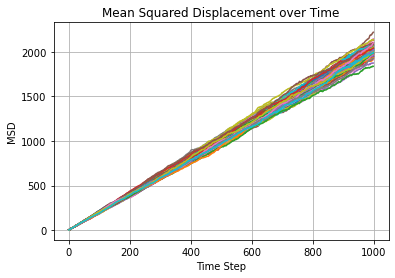

In [ ]:
def mean_squared_distance(n_walks, steps):
    msd = np.zeros(steps)
    for i in range(n_walks):
        walk = np.linalg.norm(walk2D(steps)[0], axis=0)
        msd += walk**2
    msd /= n_walks
    return msd

for i in range(100):
    msd = mean_squared_distance(n_walks=1000, steps=1000)
    plt.plot(msd)
plt.title('Mean Squared Displacement over Time')
plt.xlabel('Time Step')
plt.ylabel('MSD')
plt.grid(True)
plt.show()


From above we can see that the mean square displacement grows linearly with the number of steps.

We check this:

$$X_i^2 = (\sum_{i=1}^t Y_i)^2 = \sum_{i+1}^t Y_i^2 + 2 \sum_{1\leq i <j \leq t} Y_i Y_j  $$
By linearity of expectation:
$$ \mathbb{E}[X_t^2] = \sum_{i+1}^t \mathbb{E} [Y_i^2] + 2 \sum_{1\leq i <j \leq t} \mathbb{E}[Y_i Y_j] $$ 
As after each step the absolute distance is always 1 then $\mathbb{E}[Y_i^2] = 1$ and as the steps are independent $\mathbb{E}[Y_i Y_j] = \mathbb{E}[Y_i]\mathbb{E}[Y_j]$ = 0
We get
$$\mathbb{E}[X_t^2] = \sum_{i=1}^t 1 + 2\times0 = t $$
